<a href="https://colab.research.google.com/github/RDLL/curso_mineria_de_datos/blob/main/Tarea_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Analysis
## Tarea 8
## Algoritmo K-means: clasificador de vinos



In [ ]:
pip install pyclustering

In [42]:
#Tratamiento de datos
#====================================
import pandas as pd
import numpy as np
from sklearn import svm,datasets
import math

#Graficos
#====================================
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

#Preprocesado y análisis
#====================================
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import contingency_matrix
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.encoder import cluster_encoder
from pyclustering.cluster.kmeans import kmeans

plt.style.use('ggplot')

In [2]:
wine = datasets.load_wine()
wine.keys()
y = wine['target']

In [3]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
wine['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
preprocessor = Pipeline(
    [
        ("scaler",MinMaxScaler()),
        ("pca",PCA(n_components=2,random_state=42))
    ]
)

In [7]:
cluster = Pipeline(
    [
        ("kmeans",KMeans(
            n_clusters=3,
            init="k-means++",
            n_init=50,
            max_iter=5000,
            random_state=42
        ))
    ]
)

In [8]:
pipe = Pipeline([("preprocessor",preprocessor),("cluster",cluster)])

In [9]:
pipe.fit(wine['data'])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('cluster',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=5000, n_clusters=3, n_init=50,
                                         random_state=42))]))])

In [10]:
preprocessed_data = pipe["preprocessor"].transform(wine['data'])
preprocessed_data

array([[-7.06335756e-01, -2.53192753e-01],
       [-4.84976802e-01, -8.82289142e-03],
       [-5.21172266e-01, -1.89187222e-01],
       [-8.21643663e-01, -5.80905512e-01],
       [-2.02546382e-01, -5.94665740e-02],
       [-6.08190152e-01, -4.87519191e-01],
       [-5.44047399e-01, -3.00196497e-01],
       [-4.74357495e-01, -2.98197021e-01],
       [-5.00432012e-01, -3.07602859e-01],
       [-6.27517969e-01, -2.06328233e-01],
       [-7.27467157e-01, -3.56512044e-01],
       [-3.74967744e-01, -2.25424535e-01],
       [-4.48188283e-01, -2.31938139e-01],
       [-6.26345329e-01, -3.55138677e-01],
       [-8.35717011e-01, -5.38047802e-01],
       [-4.71931568e-01, -3.37405385e-01],
       [-4.26990905e-01, -4.50842684e-01],
       [-3.66595704e-01, -3.15750341e-01],
       [-7.18788533e-01, -5.93881332e-01],
       [-4.58884986e-01, -1.75782240e-01],
       [-6.61852288e-01, -1.27831032e-01],
       [-2.67900032e-01,  9.81127565e-03],
       [-5.99782399e-01,  7.82494523e-04],
       [-4.

In [11]:
predicted_labels = pipe["cluster"]["kmeans"].labels_
predicted_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [12]:
pipe["cluster"]["kmeans"].inertia_

10.77176280410001

### Clasificación con el modelo kmeans

In [13]:
y_predict = pipe["cluster"]["kmeans"].labels_

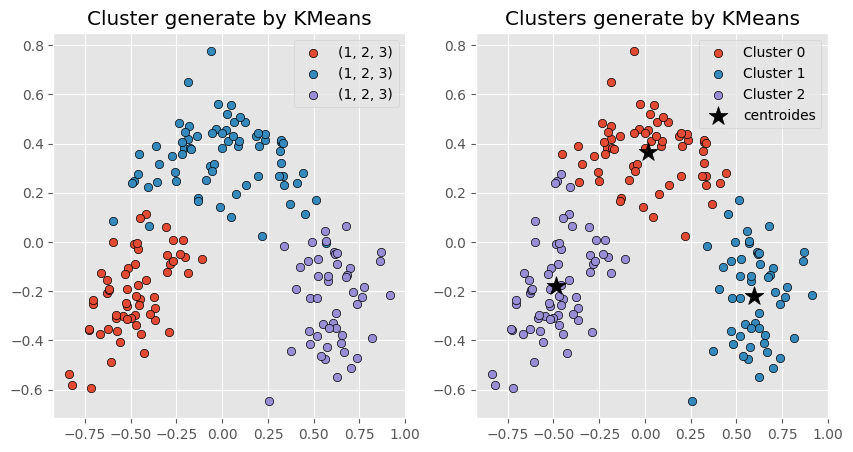

In [18]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
for i in np.unique(wine['target']):
  ax[0].scatter(
      x = pipe["preprocessor"].transform(wine['data'])[wine['target'] == i,0],
      y = pipe["preprocessor"].transform(wine['data'])[wine['target'] == i,1],
      c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
      marker = 'o',
      edgecolor = 'black',
      label=(1,2,3)
  )

ax[0].set_title('Cluster generate by KMeans')
ax[0].legend();

for i in np.unique(pipe["cluster"]["kmeans"].labels_):
  ax[1].scatter(
      x = preprocessed_data[pipe["cluster"]["kmeans"].labels_ == i,0],
      y = preprocessed_data[pipe["cluster"]["kmeans"].labels_ == i,1],
      c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
      marker = 'o',
      edgecolor = 'black',
      label = f"Cluster {i}"
  )

ax[1].scatter(
    x = pipe["cluster"]["kmeans"].cluster_centers_[:,0],
    y = pipe["cluster"]["kmeans"].cluster_centers_[:,1],

    c = 'black',
    s = 200,
    marker = '*',
    label = 'centroides'
)

ax[1].set_title('Clusters generate by KMeans')

ax[1].legend();

In [19]:
pd.crosstab(wine['target'],pipe["cluster"]["kmeans"].labels_,dropna=False,rownames=['grupo_real'],colnames=['cluster'])

cluster,0,1,2
grupo_real,,,
0,0,0,59
1,62,3,6
2,0,48,0


In [21]:
sil_scores = []
ari_scores = []
for i in range(2,13):
  pipe["preprocessor"]["pca"] .n_components = i
  pipe.fit(wine['data'])

  sil_coef = silhouette_score(
      pipe["preprocessor"].transform(wine['data']),
      pipe["cluster"]["kmeans"].labels_
  )
  ari = adjusted_rand_score(
      wine['target'],
      pipe["cluster"]["kmeans"].labels_
  )
  sil_scores.append(sil_coef)
  ari_scores.append(ari)

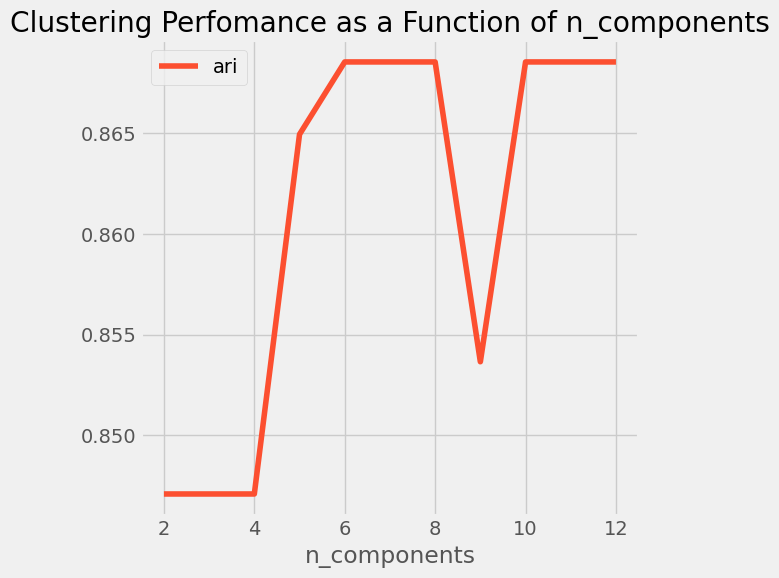

In [22]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.plot(range(2,13),ari_scores,c="#fc4f30",label="ari")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Perfomance as a Function of n_components")
plt.tight_layout()
plt.show()

In [23]:
pipe["preprocessor"]["pca"].n_components = 10
pipe.fit(wine['data'])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=10, random_state=42))])),
                ('cluster',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=5000, n_clusters=3, n_init=50,
                                         random_state=42))]))])

### Nueva agrupación con KMeans

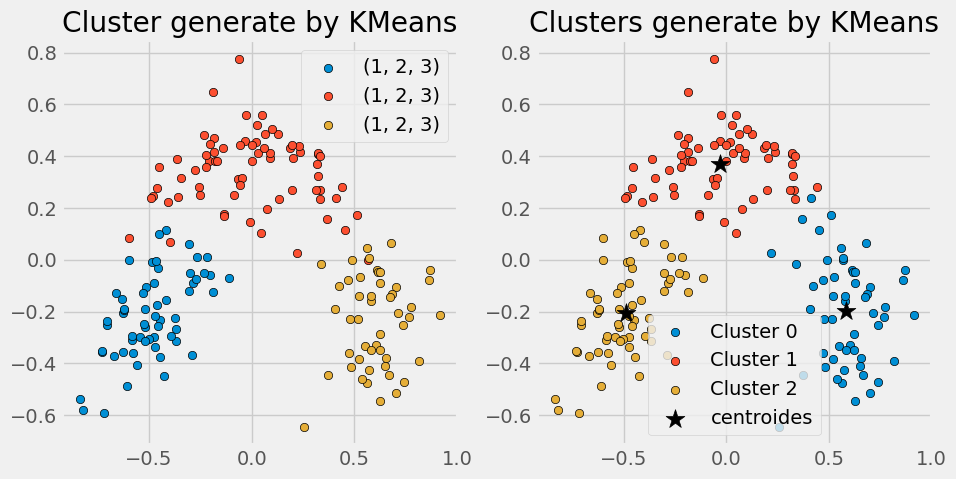

In [24]:
y_predict = pipe["cluster"]["kmeans"].labels_

fig,ax = plt.subplots(1,2,figsize=(10,5))

for i in np.unique(wine['target']):
  ax[0].scatter(
      x = pipe["preprocessor"].transform(wine['data'])[wine['target'] == i,0],
      y = pipe["preprocessor"].transform(wine['data'])[wine['target'] == i,1],
      c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
      marker = 'o',
      edgecolor = 'black',
      label=(1,2,3)
  )

ax[0].set_title('Cluster generate by KMeans')
ax[0].legend();

for i in np.unique(pipe["cluster"]["kmeans"].labels_):
  ax[1].scatter(
      x = preprocessed_data[pipe["cluster"]["kmeans"].labels_ == i,0],
      y = preprocessed_data[pipe["cluster"]["kmeans"].labels_ == i,1],
      c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
      marker = 'o',
      edgecolor = 'black',
      label = f"Cluster {i}"
  )

ax[1].scatter(
    x = pipe["cluster"]["kmeans"].cluster_centers_[:,0],
    y = pipe["cluster"]["kmeans"].cluster_centers_[:,1],

    c = 'black',
    s = 200,
    marker = '*',
    label = 'centroides'
)

ax[1].set_title('Clusters generate by KMeans')

ax[1].legend();

In [27]:
pd.crosstab(wine['target'],pipe["cluster"]["kmeans"].labels_,dropna=False,rownames=['grupo_real'],colnames=['cluster'])

cluster,0,1,2
grupo_real,,,
0,0,0,59
1,6,63,2
2,48,0,0


In [28]:
x = pipe["preprocessor"].transform(wine['data'])

km_model = KMeans(n_clusters=3,random_state=10,n_init=50)

km = km_model.fit_predict(x)

centroids = km_model.cluster_centers_

labels = km_model.labels_

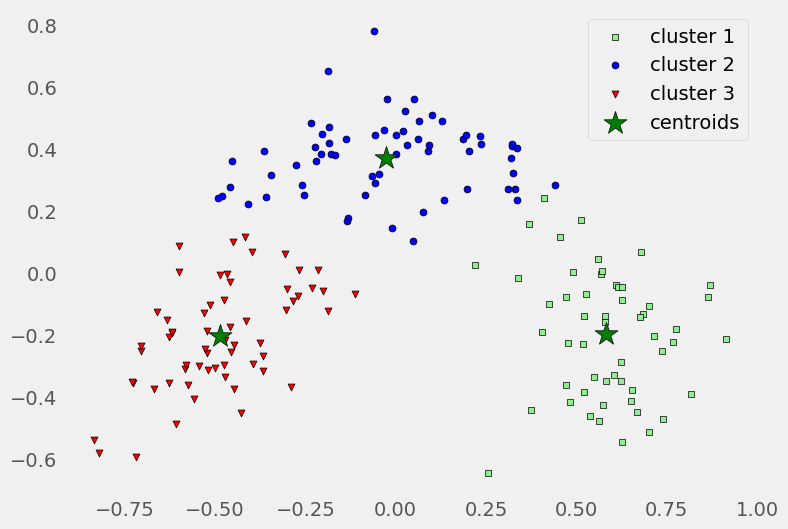

In [30]:
plt.figure(figsize=(8,6))
#clusters
plt.scatter(
    x[km == 0,0],x[km == 0,1],
    s = 25,
    c = 'lightgreen',
    marker = 's',
    edgecolor = 'black',
    label = 'cluster 1'
)
plt.scatter(
    x[km == 1,0],x[km == 1,1],
    s = 25,
    c = 'blue',
    marker = 'o',
    edgecolor = 'black',
    label = 'cluster 2'
)

plt.scatter(
    x[km == 2,0],x[km == 2,1],
    s = 25,
    c = 'red',
    marker = 'v',
    edgecolor = 'black',
    label = 'cluster 3'
)
#centroids
plt.scatter(
    centroids[:,0],centroids[:,1],
    s = 300,
    c = 'green',
    marker = '*',
    edgecolor = 'black',
    label = 'centroids'
)

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

In [35]:
def purity_score(true,pred):
  confusion_matrix = contingency_matrix(true,pred)
  return np.sum(np.amax(confusion_matrix,axis=0))/np.sum(confusion_matrix)

purity = purity_score(y,labels)
print(f"The purity score is {round(purity*100,2)}%")

The purity score is 95.51%


In [39]:
def distanciaE(point1, point2):
     distance = 0.0
     for i in range(len(point1)):
         distance += (point1[i] - point2[i]) ** 2.0
     return math.sqrt(distance)

def distanciaAVE(point1, point2):
     distance = 0.0
     for i in range(len(point1)):
         distance += (point1[i] - point2[i]) ** 2.0
     return math.sqrt(distance/len(point1))

def distanciaWE(point1, point2):
     W=(0.1,0.1,0.1,0.7)
     distance = 0.0
     for i in range(len(point1)):
         distance += W[i]*(point1[i] - point2[i]) ** 2.0
     return math.sqrt(distance)

distance_measures = {'Euclidiana': 0, 'Euclidiana cuadrada': 1, 'Manhattan': 2,
'Chebyshev': 3, 'Canberra': 5, 'Chi-square': 6}



In [44]:
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(x, 3, random_state=5).initialize()
    if dist_measure!=1000:
        instanceKm = kmeans(x, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    else:
        instanceKm = kmeans(x, initial_centers=initial_centers, metric=distance_metric(1000, func=distanciaWE))

    instanceKm.process()
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, x)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()

    return purity_score(y, pyLabels)


for measure, value in distance_measures.items():
 print(f"Purity score con distancia {measure}:{round(pyPurity(value)*100, 2)}%")

Purity score con distancia Euclidiana:94.94%
Purity score con distancia Euclidiana cuadrada:94.38%
Purity score con distancia Manhattan:94.94%
Purity score con distancia Chebyshev:89.89%
Purity score con distancia Canberra:51.12%
Purity score con distancia Chi-square:95.51%
